# The causes of deaths in Scotland analysis

## The function we need to import

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

In this assignment, I personally focused on the analysis of the Accidental deaths, the death of Dementia, and the death of MRAS in Scotland. In the analysis of the cause of accidental death, i added Dimentia and avoidable death to analyze together. Finally, the MRAS was analyzed separately.

#If you want to run the code, please make sure the packages are download in the environment.

## Accidental deaths

### The relationship between the sex

In [2]:
Ad_all = pd.read_excel("Ad-sex.xlsx")
line1 = go.Scatter(y = Ad_all['Total number of death'],x = Ad_all['Time'],name="Total number of death")
line2 = go.Scatter(y = Ad_all['Female'],x = Ad_all['Time'],name="Female")
line3 = go.Scatter(y = Ad_all['Male'],x = Ad_all['Time'],name="Male")
fig = go.Figure([line1,line2,line3])
fig.update_layout(
    title = "The relationship between sex and Accidental deaths",
    xaxis_title = 'Time',
    yaxis_title = 'The number of deaths'
)
fig.show()

The data is a description of the total number of deaths per year in Scotland from 1855 to 2018, and data separated by sex.

·As can be seen from the figure, when the mouse was placed in 1981, it can be seen that the death toll reached its highest value, and then there has been a downward trend, reaching a minimum in 2011, but in recent years there has been rising trend.

·We can assume that sex in Accidental deaths is nearly 50% in each sexual.

### The relationship between area

In [3]:
Ad_area=pd.read_excel("Ad-area.xlsx")
a = Ad_area.columns.values.tolist()
del(a[0])
b = []
for i in range(len(a)):
    line = go.Scatter(x=Ad_area['Time'], y=Ad_area[a[i]], name=a[i])
    b.append(line)
    fig = go.Figure(b)
    fig.update_layout(
    title = 'The relationship between area and Accidental deaths',
    xaxis_title = 'Time',
    yaxis_title = 'Number of death'
)
fig.show()

This data sheet contains statistics on deaths in various regions from 2000 to 2018 due to accidental deaths.

·We can note that most of areas have the stable change within the years, while some of areas like Greater Glasgow and Clyde is still showing increasing trend. And they always have the largest number of accidental deaths, which means this area should improve people's safety attention and education.

#### ·The connection with avoidable number in area

In [4]:
Avoid_area=pd.read_excel("Avoidable-area.xlsx")
k = Avoid_area.columns.values.tolist()
del(k[0])
j = []
for i in range(len(k)):
    line = go.Scatter(x=Avoid_area['Time'], y=Avoid_area[k[i]], name=k[i])
    j.append(line)
    fig = go.Figure(j)
    fig.update_layout(
    title = 'The avoidable number with different area',
    xaxis_title = 'Time',
    yaxis_title = 'Number of avoidable death'
)
fig.show()

This data sheet contains the total number of people who can avoid deaths from 2014 to 2018 in different regions.

·Since subjectively large chances of accidental death are avoidable, it is desirable to observe the relationship between the number of deaths and the number of accidental deaths.

·Comparing the data to avoid deaths and accidental deaths in different regions, they are roughly proportional. Therefore, it can be guessed that the degree of control over the number of accidental deaths in each region is consistent.

### The relationship between age group

In [5]:
Ad_age = pd.read_excel("Ad-age.xlsx")
data_2014_2018 = Ad_age[(Ad_age["Time"] >= 2014)]
c = Ad_age.columns.values.tolist()
del(c[0])
d = []
for i in range(len(c)):
    bar = go.Bar(y = data_2014_2018[c[i]], x = data_2014_2018["Time"], name = c[i],
              text = data_2014_2018[c[i]],textposition = 'outside')
    d.append(bar)
    fig3 = go.Figure(d)
fig3.update_layout(
    title = 'The relationship between different age group and Accidental deaths',
    xaxis_title = 'Time',
    yaxis_title = 'Number of Accidental deaths'
)
fig3.show()

This data set contains statistics on the number of people who died from accidents between 2014 and 2018 from people aged 0-85+.

·Looking at the situation in the past five years, with the increase of age, the number of people who died in accidents grew slowly but there will be a slight decline until the age of 50, and then sharp increase from the age of 70. 

·The number of accidental deaths among the elderly is the highest, probably due to the inconvenience of the elderly, It can be known from the causes of accidental death that we see the highest proportion of deaths from falling(you can see the figure below), and there are reasons to believe that the elderly are inconvenient to move.

#### ·The connection with people who have Dimentia.

In [6]:
Dementia_age = pd.read_excel("Dementia-age.xlsx")
Dementia_age = Dementia_age[(Dementia_age["Time"] >= 2014)]
l = Dementia_age.columns.values.tolist()
del(l[0])
m = []
for i in range(len(l)):
    bar = go.Bar(y = Dementia_age[l[i]], x = Dementia_age["Time"], name = l[i],
              text = Dementia_age[l[i]],textposition = 'outside')
    m.append(bar)
    fig5 = go.Figure(m)
fig5.update_layout(
    title = 'The connection with people who have Dementia',
    xaxis_title = 'Time',
    yaxis_title = 'Number of deaths due to Dimentia'
)
fig5.show()

This dataset contains statistics on the number of people who died from Dimentia between 2014 and 2018 from people aged 0-90+.

·According to the chart, as the age increases, the older person suffers from dementia and the number of deaths gradually increases. 

·According to common sense, during the episode, people's awareness of prevention will be subject to certain interference, so it is suspected that the number of deaths with dementia between different age groups will be related to the number of people who have died in accidents.

#### ·The connection between the poeple who have Dementia and people died in accidental.

In [7]:
from plotly.subplots import make_subplots
Dementia_age1 = pd.read_excel("Dementia-age.xlsx")
Last_Ad_age = Ad_age[(Ad_age["Time"] >= 2000)]
Last_Ad_age = Last_Ad_age.iloc[:,[0,-5,-4,-3,-2,-1]]

Dementia_age1['85+'] = Dementia_age1['85-89'] + Dementia_age1['90+']
del(Dementia_age1['0-59'])
del(Dementia_age1['85-89'])
del(Dementia_age1['90+'])
del(Dementia_age1['60-64'])

o = Dementia_age1.columns.values.tolist()
for i in range(1,len(o)):
    line1 = go.Scatter(x= Dementia_age1['Time'], y= Dementia_age1[o[i]], name=o[i])
    line2 = go.Scatter(x= Last_Ad_age['Time'], y= Last_Ad_age[o[i]], name=o[i])
    fig15 = make_subplots(rows=1, cols=2)
    fig15.add_trace(line1,
        row=1, col=1
)
    fig15.add_trace(line2,
        row=1, col=2           
)
    fig15.update_layout(height=600, width=800, title_text=o[i])
    fig15.update_xaxes(title_text='Time', row=1, col=1)
    fig15.update_xaxes(title_text='Time', row=1, col=2)
    
    fig15.update_yaxes(title_text=o[i], row=1, col=1)
    fig15.update_yaxes(title_text=o[i], row=1, col=2)
    fig15.show()


#In the processing of the data, the data before the age of 0-59, in which the accident occurred, was deleted, and the data of 85-89, 90+ was combined into 85+, in order to be consistent with the Dementia data set.

This data set contains statistics on the number of deaths and accidental deaths from Dimentia between 2000 and 2018 by people over the age of 65.

·From the data we can see that the older the age, the number of accidental deaths is positively related to the number of deaths in Dementia, so it is speculated that due to Dementia, accidental death may occur during the onset.

#### ·The connection with avoidable number in death

In [8]:
Avoid_age = pd.read_excel("Avoidable-age.xlsx")
g = Avoid_age.columns.values.tolist()
del(g[0])
h = []
for i in range(len(g)):
    bar = go.Bar(y = Avoid_age[g[i]], x = Avoid_age["Time"], name = g[i],
              text = Avoid_age[g[i]],textposition = 'outside')
    h.append(bar)
    fig4 = go.Figure(h)
fig4.update_layout(
    title = 'The avoidable number with different age group',
    xaxis_title = 'Time',
    yaxis_title = 'Number of avoidable death'
)
fig4.show()

This set of data describes the number of avoidable deaths from different age structures from 2014 to 2018.

·As can be seen from the chart, the number of middle-aged people (45-75 years old) who can avoid death is the highest. However, in the causes of accidental death, it can be found that the proportion of avoidable deaths in those people is low. 

·On the contrary, in the case of people over the age of 75, the proportion of accidental deaths is higher, so it can be analyzed that the elderly over 75 can strengthen the protection of accidental death, while the main protection measures for middle-aged people need to be found in other types.

### The different causes of accidental deaths

In [9]:
Ad_causes = pd.read_excel("Ad-causes.xlsx")
e = []
f = Ad_causes.columns.values.tolist()
del(f[0])
fig1 = px.scatter_matrix(Ad_causes, dimensions = f)
fig1.update_layout(
    title = 'The different causes of accidental deaths'
)
fig1.update_traces(diagonal_visible=False)
fig1.update_layout(
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig1.show()

#The name between axis may not be visible, but as long as you place the mouse on the map, you can know the information in the map.

This set of data describes data on deaths from different causes of death from 2000 to 2018.

·When arranging and combining the relationships between various causes of accidental death, it can be found that most of the causes of death are irrelevant, that is, independent of each other.

# MRSA

## The total number death by MRSA

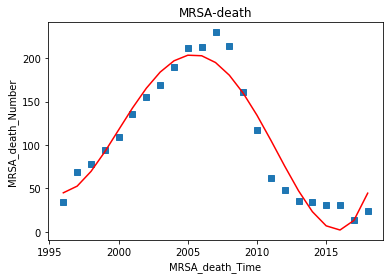

function is :
          4         3             2
0.01809 x - 145.2 x + 4.368e+05 x - 5.84e+08 x + 2.928e+11


In [10]:
MRSA_death = pd.read_excel("MRSA-death.xlsx")
MRSA_death_Time = np.array(MRSA_death['Time'])
MRSA_death_Number = np.array(MRSA_death["Number"])
f1 = np.polyfit(MRSA_death_Time, MRSA_death_Number, 4)
function = np.poly1d(f1)
yvals = function(MRSA_death_Time)
plot1 = plt.plot(MRSA_death_Time, MRSA_death_Number, 's',label='original values')
plot2 = plt.plot(MRSA_death_Time, yvals, 'r',label='polyfit values')
plt.xlabel('MRSA_death_Time')
plt.ylabel('MRSA_death_Number')
plt.title('MRSA-death')
plt.show()
print('function is :\n',function)

This set of data describes the number of deaths due to MRSA from 1996 to 2018.

·For the chart, it can be guessed that there should be an upward trend in the number of MARS deaths in the next year.  There has been a significant downward trend in recent years, and it can be speculated that the effectiveness of the vaccine is implemented, and there is an upward trend in the past two years, probably due to the mutation of the virus.

### The relationship between area

In [11]:
MRSA_area = pd.read_excel("MRSA-area.xlsx")
Temp = MRSA_area.columns.values.tolist()

Data_2018 = MRSA_area[(MRSA_area["Time"] == 2018)]
Data_2009 = MRSA_area[(MRSA_area["Time"] == 2009)]
Data_2000 = MRSA_area[(MRSA_area["Time"] == 2000)]

Data_2018 = Data_2018.drop(['Time','Scotland'],1)
Data_2009 = Data_2009.drop(['Time','Scotland'],1)
Data_2000 = Data_2000.drop(["Time","Scotland"],1)

Data_2018_num = Data_2018.values.tolist()
Data_2009_num = Data_2009.values.tolist()
Data_2000_num = Data_2000.values.tolist()


labels = Temp[2:]

fig12 = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig12.add_trace(go.Pie(labels=labels, values=Data_2018_num[0], name="2018"),
              1, 1)
fig12.add_trace(go.Pie(labels=labels, values=Data_2009_num[0], name="2009"),
              1, 2)
fig12.add_trace(go.Pie(labels=labels, values=Data_2000_num[0], name="2000"),
              1, 3)

fig12.update_traces(hole=.4, hoverinfo="label+percent+name")

fig12.update_layout(
    title_text="The three years' proportion in deaths caused by MRSA",
    annotations=[dict(text='2018', x=0.105, y=0.5, font_size=20, showarrow=False),
                 dict(text='2009', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='2000', x=0.895, y=0.5, font_size=20, showarrow=False),
                 ])
fig12.show()

This set of data describes the number of deaths due to MRSA in different regions over the past two decades.

·As can be seen from the figure, the Greater Glasgow & Clyde area, which has been the highest in the past two decades, has experienced a significant decline. 

·By 2018, there have been five regions that are not affected by the MRAS virus, but we can still find that some areas, such as Lanarkshire, Forth Vally, Grampian, etc., still have a large proportion, indicating that these areas may have been affected by new MRAS infections, and relevant departments should take note of this phenomenon and strengthen prevention.